Case Study 1:
Dataset Description: The file consists of start-ups investment details.

1.	Read the given comma separated values as dataframe (investments.csv)
2.	List out all column names.
3.	Create a dataframe with numerical columns.
4.	Create a dataframe with categorical columns.
5.	Get a summary on the data and draw inferences if any.
6.	Display duplicate rows.
7.	For each column find out the percentage of missing values.
8.	Find count of ‘name’ in each ‘country_code’.
9.	What is the percentage of the companies which have status ‘acquired’ ‘operating’?
10.	What is the percentage of the companies which have status ‘acquired’ acquired?
11.	Filter records having missing values in column ‘year_founded’.
12.	Create a column ‘category_list_count’ having count of category lists.
13.	Find average funding_total_usd for each country_code.
14.	Find total funding_total_usd for each country_code.
15.	Find average funding_total_usd in each country_code and region.
16.	How many companies have got just 1 round of funding?
17.	Perform mapping on status column; acquired -> A, operating -> O and closed -> C.
18.	How many companies have ‘debt_financing’ above zero?
19.	Create a column ‘homepage’ to store company name from ‘homepage_url’: For example: If url is http://www.waywire.com, name is waywire.
20.	Find the count of companies in each of the markets.
21.	Find the count of companies in each of the markets and store the new column ‘cnt_name’ in the original dataframe.
22.	Rename ' funding_total_usd ' to 'funding_total_usd'
23.	Fill missing values in column ‘city’ with ‘other_city’
24.	For each row in column ‘funding_total_usd’, calculate actual – average value for each group ‘city’
25.	Normalize ‘‘funding_total_usd’ at country level.
26.	What is the average ‘funding_total_usd’ for each city?
27.	Plot histogram/distribution of ‘funding_total_usd’ and provide insights if any.
28.	What is maximum ‘funding_total_usd’ for each market status?
29.	How many years has it been since each company was founded?
30.	Visualize ‘grant’ distribution.
31.	Visualize ‘debt_financing’ distribution.
32.	Display proportion of companies status.
33.	How many US states are available?
34.	create column ‘cmt_address’ by joining country code, state code, region and city.
35.	select columns with underscore in their names.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Read the given comma separated values as dataframe (investments.csv)

df = pd.read_csv("investments - investments.csv")
df.head()
# List out all column names.
df.columns


Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_year', 'debt_financing', 'grant'],
      dtype='object')

In [17]:
# Create a dataframe with numerical columns.
df1 = df.select_dtypes(include = "number")
# Create a dataframe with categorical columns.
df2 = df.select_dtypes(include = [np.object])
df2.head(2)


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles


In [18]:
# Get a summary on the data and draw inferences if any.
df.describe()


,funding_rounds,founded_year,debt_financing,grant
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,1.888157e+06,1.628453e+05
std,1.294213,7.579203,1.382046e+08,5.612088e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,3.007950e+10,7.505000e+08


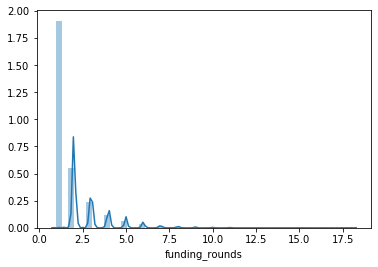

In [19]:
# sns.lineplot(data=df, x="funding_rounds", y='founded_year')
sns.distplot(df.funding_rounds)
plt.show()

In [20]:
# Display duplicate rows.
df.duplicated().sum()
df.duplicated(['funding_rounds','founded_year','debt_financing']).sum()
df[['funding_rounds','founded_year','debt_financing']]
df.drop_duplicates(subset=['funding_rounds','founded_year','debt_financing'], keep='last')


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
16,10-20 Media,http://www.10-20media.com,|E-Commerce|,E-Commerce,"20,50,000",operating,USA,MD,Baltimore,Woodbine,4,2001.0,2050000,0
21,1000museums.com,http://www.1000museums.com,|Curated Web|,Curated Web,"49,62,651",operating,USA,WA,Seattle,Bellevue,6,2008.0,1147879,0
34,10X Technologies,http://10xtechnologies.com,|Biotechnology|,Biotechnology,"30,00,000",operating,USA,CA,SF Bay Area,Oakland,1,2012.0,3000000,0
35,10X10 Room,http://10x10room.com,|Software|,Software,"77,500",operating,USA,MA,Boston,Lexington,1,2010.0,77500,0
73,1DayLater,http://1daylater.com,|Tracking|Curated Web|,Curated Web,"43,811",operating,NaN,NaN,NaN,NaN,2,2009.0,31924,11887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49432,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,Gerasdorf Bei Wien,1,2007.0,0,0
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,London,1,2013.0,0,0
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NaN,Split,Split,5,2012.0,0,0
49436,[a]list games,http://www.alistgames.com,|Games|,Games,"93,00,000",operating,NaN,NaN,NaN,NaN,1,NaN,0,0


In [21]:
# For each column find out the percentage of missing values.
df.isnull().sum()/df.shape[0]


name                 0.000020
homepage_url         0.069764
category_list        0.080121
market               0.080262
funding_total_usd    0.000000
status               0.026579
country_code         0.106659
state_code           0.389923
region               0.106659
city                 0.123711
funding_rounds       0.000000
founded_year         0.221611
debt_financing       0.000000
grant                0.000000
dtype: float64

In [22]:
# Find count of ‘name’ in each ‘country_code’.
df.groupby('country_code')['name'].count().reset_index().sort_values(by=['name'], ascending=False)


,country_code,name
110,USA,28793
38,GBR,2642
17,CAN,1405
20,CHN,1239
28,DEU,968
...,...,...
53,JEY,1
52,JAM,1
21,CIV,1
15,BRN,1


In [23]:
# What is the percentage of the companies which have status ‘acquired’ ‘operating’?
df[df.status=='acquired' ]   
df1 = df[df['status'].isin(['acquired', 'operating'])]
df1.groupby('status')['name'].count()/df1.shape[0]*100

status
acquired      8.110542
operating    91.889458
Name: name, dtype: float64

In [24]:
# Filter records having missing values in column ‘year_founded’.
df[df.founded_year.isnull()].head()


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0
6,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,Buenos Aires,1,NaN,0,0
9,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,0,0
11,1-4 All,NaN,|Entertainment|Games|Software|,Software,-,operating,USA,NC,NC - Other,Connellys Springs,1,NaN,0,0
19,1000jobboersen.de,http://www.1000jobboersen.de,|Curated Web|,Curated Web,-,operating,DEU,NaN,Berlin,Berlin,1,NaN,0,0


In [25]:
# Create a column ‘category_list_count’ having count of category lists.

df['category_list_count'] = df.category_list.apply(lambda x: len(str(x).split("|"))-2)
df.loc[:,['category_list','category_list_count']]

,category_list,category_list_count
0,|Entertainment|Politics|Social Media|News|,4
1,|Games|,1
2,|Publishing|Education|,2
3,|Electronics|Guides|Coffee|Restaurants|Music|i...,10
4,|Tourism|Entertainment|Games|,3
...,...,...
49433,|Analytics|Gamification|Developer APIs|iOS|And...,6
49434,|Enterprise Software|,1
49435,|Web Development|Advertising|Wireless|Mobile|,4
49436,|Games|,1


In [26]:
# Find average funding_total_usd for each country_code.

# df.replace({'funding_total_usd': {',': '', '-': '0'}}, regex=True, inplace=True)
# df.funding_total_usd = pd.to_numeric(df['funding_total_usd'],errors='raise')

# df.groupby('country_code')['funding_total_usd'].mean()


In [27]:
#Alternate approach

import re

df.funding_total_usd = df.funding_total_usd.apply(lambda x: re.sub(',','',x))
df.funding_total_usd = np.where(df.funding_total_usd=='-', '0',df.funding_total_usd)
df.funding_total_usd = df.funding_total_usd.astype('float')
df.groupby('country_code')['funding_total_usd'].mean().reset_index()

,country_code,funding_total_usd
0,ALB,0.000000e+00
1,ARE,9.832352e+06
2,ARG,1.787353e+06
3,ARM,1.340649e+07
4,AUS,8.276922e+06
...,...,...
110,USA,1.612353e+07
111,UZB,9.000000e+04
112,VNM,1.023431e+07
113,ZAF,1.243687e+07


In [28]:
# Find average funding_total_usd in each country_code and region.
df[['country_code','region']]
df.groupby(by=['country_code','region'])['funding_total_usd'].mean()


country_code  region      
ALB           Tirana          0.000000e+00
ARE           Abu Dhabi       1.562500e+07
              Dubai           9.651332e+06
ARG           ARG - Other     3.049519e+05
              Buenos Aires    1.760614e+06
                                  ...     
ZAF           Cape Town       1.559547e+07
              Durban          0.000000e+00
              Johannesburg    6.091429e+06
              ZAF - Other     0.000000e+00
ZWE           Harare          1.000000e+07
Name: funding_total_usd, Length: 1096, dtype: float64

In [29]:
# How many companies have got just 1 round of funding?
print(df[df['funding_rounds'] == 1].shape[0])
print(len(set(df[df['funding_rounds'] == 1]['name'])))
print(len(df[df['funding_rounds'] == 1]['name'].unique()))
print(df[df['funding_rounds'] == 1]['name'].nunique()) #do not concider nan value


32039
32006
32006
32005


In [118]:
# Perform mapping on status column; acquired -> A, operating -> O and closed -> C.
map = {'acquired':'A','operating':'O','closed':'C'}
df.status=df.status.map(map)
df.head(3)


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,A,USA,NY,New York City,New York,1,2012.0,0,0,1.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,O,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,846.0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,O,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,3.0


In [272]:
# alternate approach
df.status.apply(lambda x : 'A' if x == 'acquired' else ('O' if x == 'operating' else ('C' if x =='closed' else 'unknown') ))

0        A
1        O
2        O
3        O
4        O
        ..
49433    O
49434    O
49435    O
49436    O
49437    O
Name: status, Length: 49438, dtype: object

In [33]:
# How many companies have ‘debt_financing’ above zero?
df.debt_financing.value_counts()
df[df['debt_financing']>0].shape[0]

#count the duplicate also

4225

In [34]:
# Create a column ‘homepage’ to store company name from ‘homepage_url’: For example: If url is http://www.waywire.com, name is waywire.
import tldextract
col = df.homepage_url.values
output = []
for i in col:
    list = tldextract.extract(str(i))
    output.append(list.domain)
df['homepage']=output
df.head(4)



,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,homepage,cnt_name
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,waywire,378.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,enjoyandtv,1182.0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2,rockyourpaper,69.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,10,InTouchNetwork,43.0


In [30]:
# df['homepage'] = df.homepage_url.apply(lambda x: re.sub(pattern = "(http://www.|.com|.org|http://|/)", repl= '', string = str(x)))

In [35]:
# Find the count of companies in each of the markets.
df.groupby('market')['name'].count()

market
3D               25
3D Printing       9
3D Technology     8
Accounting       18
Ad Targeting     13
                 ..
iOS              48
iPad             29
iPhone           69
iPod Touch        3
mHealth           8
Name: name, Length: 753, dtype: int64

In [36]:
# Find the count of companies in each of the markets and store the new column ‘cnt_name’ in the original dataframe.

df['cnt_name'] = df.groupby('market')['name'].transform('count')
df[df.market=='3D'].head(3)
df.loc[:,['market','cnt_name']]

,market,cnt_name
0,News,378.0
1,Games,1182.0
2,Publishing,69.0
3,Electronics,43.0
4,Tourism,21.0
...,...,...
49433,Education,863.0
49434,Enterprise Software,1280.0
49435,Web Development,103.0
49436,Games,1182.0


In [ ]:
# df.groupby('market')['name']

In [37]:
# Rename ' funding_total_usd ' to 'funding_total_usd'
df.rename(columns = {' funding_total_usd ': 'funding_total_usd'}, inplace = True)
df.head(4)


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,homepage,cnt_name
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,waywire,378.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,enjoyandtv,1182.0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2,rockyourpaper,69.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,10,InTouchNetwork,43.0


In [38]:
# Fill missing values in column ‘city’ with ‘other_city’

df.city.fillna("other_city",inplace=True)

df[df.city == 'other_city'].head(3)

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,homepage,cnt_name
7,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,2000000.0,operating,NaN,NaN,NaN,other_city,1,2007.0,0,0,1,0-6,1655.0
18,1000 Markets,http://www.1000markets.com,|Marketplaces|Art|E-Commerce|,Marketplaces,500000.0,acquired,NaN,NaN,NaN,other_city,1,2009.0,0,0,3,1000markets,204.0
24,100du.tv,http://www.100du.com,|Hospitality|,Hospitality,3000000.0,operating,NaN,NaN,NaN,other_city,2,NaN,0,0,1,100du,464.0


In [39]:
df.isnull().sum()

name                       1
homepage_url            3449
category_list           3961
market                  3968
funding_total_usd          0
status                  1314
country_code            5273
state_code             19277
region                  5273
city                       0
funding_rounds             0
founded_year           10956
debt_financing             0
grant                      0
category_list_count        0
homepage                   0
cnt_name                3968
dtype: int64

In [169]:
# For each row in column ‘funding_total_usd’, calculate actual – average value for each group ‘city’
# df_av=df[['city','funding_total_usd']].groupby('city').mean()

# df_ac=df[['city','funding_total_usd']].groupby('city').sum()

# df_ac-df_av

,funding_total_usd
city,
6 October City,0.000000
A Coruña,-0.261010
Aachen,-0.163249
Aalborg,0.000000
Aarhus,-0.383614
...,...
Évora,NaN
Évry,-0.092369
Ísafjörður,0.000000


In [281]:
temp_df = df.groupby('city')['funding_total_usd'].mean().reset_index()
temp_df[temp_df['city']=='New York']

,city,funding_total_usd
2546,New York,2.619616e+07


In [42]:
#alternate approach

df['diff'] = df.groupby('city')['funding_total_usd'].transform(lambda x: x - np.mean(x) )
df.loc[:,['city','funding_total_usd','diff']]

,city,funding_total_usd,diff
0,New York,1750000.0,-2.444616e+07
1,Los Angeles,4000000.0,-7.234447e+06
2,Tallinn,40000.0,-1.723232e+06
3,London,1500000.0,-6.784773e+06
4,Fort Worth,60000.0,-3.522942e+07
...,...,...,...
49433,London,320000.0,-7.964773e+06
49434,Beijing,1587301.0,-2.591016e+07
49435,Split,97398.0,5.826533e+04
49436,other_city,9300000.0,3.434537e+06


In [158]:
# Normalize ‘‘funding_total_usd’ at country level.

# df.funding_total_usd = (df.funding_total_usd - df.funding_total_usd.mean())/df.funding_total_usd.std()
# df.head(5)

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,homepage,cnt_name
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,-0.083962,A,USA,NY,New York City,New York,1,2012.0,0,0,1.0,waywire,378.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,-0.070623,O,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,846.0,enjoyandtv,1182.0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,-0.094099,O,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,3.0,rockyourpaper,69.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,-0.085444,O,GBR,NaN,London,London,1,2011.0,0,0,1.0,InTouchNetwork,43.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,-0.093981,O,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,1.0,nan,21.0


In [50]:
df.country_code = df.country_code.fillna('other_country')
df['funding_total_usd_Normalised'] = df.groupby('country_code')['funding_total_usd'].transform(lambda x: x/max(x) )

In [159]:
# What is the average ‘funding_total_usd’ for each city?
df[['city','funding_total_usd']].groupby('city').mean()


,funding_total_usd
city,
6 October City,-0.093477
A Coruña,-0.087003
Aachen,-0.040812
Aalborg,-0.092261
Aarhus,-0.076723
...,...
Évora,NaN
Évry,-0.092369
Ísafjörður,-0.070623


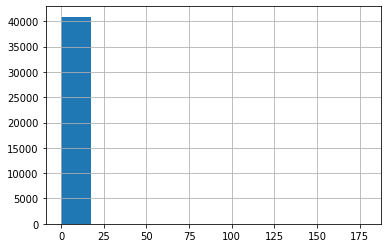

In [175]:
# Plot histogram/distribution of ‘funding_total_usd’ and provide insights if any.

df.funding_total_usd.hist()

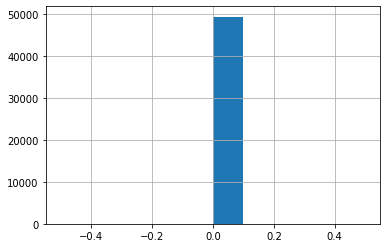

In [63]:
df['logarithm_base2'] = np.log2(np.isfinite(df['funding_total_usd']) )
df['logarithm_base2'].hist()

In [174]:
# What is maximum ‘funding_total_usd’ for each market status?
df.groupby('status')['funding_total_usd'].max()

status
A     33.697699
C      9.198499
O    178.229810
Name: funding_total_usd, dtype: float64

In [214]:
# How many years has it been since each company was founded?

from datetime import date

today = date.today()
df['founded_year'] = pd.to_datetime(df['founded_year'], format='%Y')
df.founded_year
now = pd.to_datetime('today')
now-df.founded_year


0       3192 days 14:36:36.429496
1                             NaT
2       3192 days 14:36:36.429496
3       3557 days 14:36:36.429496
4       2461 days 14:36:36.429496
                   ...           
49433   2826 days 14:36:36.429496
49434                         NaT
49435   3192 days 14:36:36.429496
49436                         NaT
49437   7940 days 14:36:36.429496
Name: founded_year, Length: 49438, dtype: timedelta64[ns]

In [53]:
from datetime import datetime
df['age_cmp'] = datetime.today().year - df.founded_year
df.loc[:,['founded_year','age_cmp']].head()

,founded_year,age_cmp
0,2012.0,8.0
1,NaN,NaN
2,2012.0,8.0
3,2011.0,9.0
4,2014.0,6.0


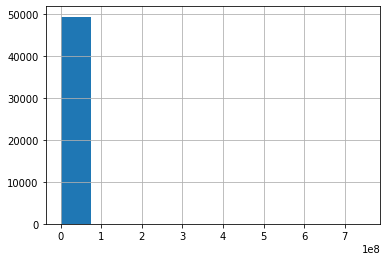

In [216]:
# Visualize ‘grant’ distribution.
df.grant.hist()

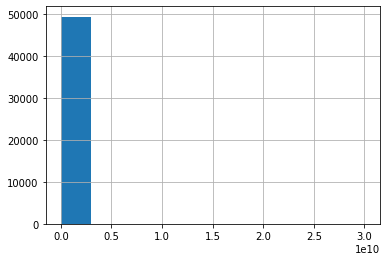

In [217]:
# Visualize ‘debt_financing’ distribution.
df.debt_financing.hist()

In [54]:
# Display proportion of companies status.
df.groupby('status')['name'].count()

status
acquired      3692
closed        2602
operating    41829
Name: name, dtype: int64

In [225]:
# How many US states are available?

df['state_code'][df['country_code']=='USA'].shape[0]

28793

In [230]:
# create column ‘cmt_address’ by joining country code, state code, region and city.
df['cmt_address'] = df.country_code +' '+ df.state_code +' '+ df.region +' '+ df.city
df.head(4)

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,homepage,cnt_name,cmt_address
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,-0.083962,A,USA,NY,New York City,New York,1,2012-01-01,0,0,1.0,waywire,378.0,USA NY New York City New York
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,-0.070623,O,USA,CA,Los Angeles,Los Angeles,2,NaT,0,0,846.0,enjoyandtv,1182.0,USA CA Los Angeles Los Angeles
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,-0.094099,O,EST,NaN,Tallinn,Tallinn,1,2012-01-01,0,0,3.0,rockyourpaper,69.0,NaN
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,-0.085444,O,GBR,NaN,London,London,1,2011-01-01,0,0,1.0,InTouchNetwork,43.0,NaN


In [57]:
# select columns with underscore in their names.
a = []
string = str(df.columns.tolist())
df.columns
for i in string.split():
    for j in i:
        if j == '_':
            a.append(i)
print(a)

["'homepage_url',", "'category_list',", "'funding_total_usd',", "'funding_total_usd',", "'country_code',", "'state_code',", "'funding_rounds',", "'founded_year',", "'debt_financing',", "'category_list_count',", "'category_list_count',", "'cnt_name',", "'funding_total_usd_Normalised',", "'funding_total_usd_Normalised',", "'funding_total_usd_Normalised',", "'age_cmp']"]


In [56]:
df.filter(regex='_').columns

Index(['homepage_url', 'category_list', 'funding_total_usd', 'country_code',
       'state_code', 'funding_rounds', 'founded_year', 'debt_financing',
       'category_list_count', 'cnt_name', 'funding_total_usd_Normalised',
       'age_cmp'],
      dtype='object')